In [103]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
#read dataset
terr = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

<ipython-input-104-f5f8a8954282>:2: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terr = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")


In [105]:
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [106]:
terr.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
100577,201103080001,2011,3,8,NaN,0,NaN,4,Afghanistan,6,...,NaN,"Xinhua News Agency, ""Afghan Female Police Offi...","BBC Monitoring South Asia, ""Taleban Report Kil...",NaN,ISVG,-9.0,-9.0,0.0,-9.0,NaN
100578,201103080002,2011,3,8,NaN,0,NaN,153,Pakistan,6,...,NaN,"South Asia Terrorism Portal, ""Ten Persons Kill...","BBC Monitoring South Asia, Pakistan's Karachi...",NaN,ISVG,-9.0,-9.0,0.0,-9.0,NaN
100579,201103080003,2011,3,8,NaN,0,NaN,153,Pakistan,6,...,NaN,"South Asia Terrorism Portal, ""Ten Persons Kill...","BBC Monitoring South Asia, Pakistan's Karachi...",NaN,ISVG,-9.0,-9.0,0.0,-9.0,NaN
100580,201103080004,2011,3,8,NaN,0,NaN,153,Pakistan,6,...,NaN,"South Asia Terrorism Portal, ""Ten Persons Kill...","BBC Monitoring South Asia, Pakistan's Karachi...","Business Recorder, Four Shot Dead in Targeted...",ISVG,-9.0,-9.0,0.0,-9.0,NaN
100581,201103080005,2011,3,8,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100582 entries, 0 to 100581
Columns: 135 entries, eventid to related
dtypes: float64(60), int64(17), object(58)
memory usage: 103.6+ MB


In [108]:
terr.size

13578570

In [109]:
terr.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.005820e+05,100582.000000,100582.000000,100582.000000,100582.000000,100582.000000,100582.000000,96532.000000,9.653100e+04,100578.000000,...,9.390000e+02,1.620000e+02,3.660000e+02,153.000000,4501.000000,3915.000000,100581.000000,100581.000000,100581.000000,100581.000000
mean,1.993214e+11,1993.147730,6.436549,15.314510,0.032401,138.718319,6.322205,21.107527,-8.851222e+02,1.433375,...,3.145382e+06,5.183865e+05,6.837217e+05,805.771242,4.395246,-19.477650,-4.242501,-4.201996,0.110657,-3.519999
std,1.065012e+09,10.650203,3.395011,8.820811,0.177065,125.898123,3.102652,21.874597,2.773977e+05,1.059023,...,3.407057e+07,2.260682e+06,3.325766e+06,5500.153662,2.062030,62.143846,4.547113,4.601351,0.718533,4.633878
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.985052e+11,1985.000000,4.000000,8.000000,0.000000,61.000000,3.000000,7.083241,-7.250388e+01,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.992022e+11,1992.000000,6.000000,15.000000,0.000000,98.000000,6.000000,26.964558,2.170410e+01,1.000000,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.003041e+11,2003.000000,9.000000,23.000000,0.000000,167.000000,10.000000,36.480453,6.436965e+01,1.000000,...,5.000000e+05,0.000000e+00,4.725000e+04,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2.011031e+11,2011.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,2.000000e+07,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
terr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [111]:
terr.nunique()

eventid       100582
iyear             41
imonth            13
iday              32
approxdate       237
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related         9528
Length: 135, dtype: int64

In [112]:
terr.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100577    False
100578    False
100579    False
100580    False
100581    False
Length: 100582, dtype: bool

In [113]:
terr.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    100253
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related        89727
Length: 135, dtype: int64

In [114]:
terr.replace(np.nan,'0',inplace=True)

In [115]:
terr['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [116]:
terr['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [117]:
terr.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG       object
INT_IDEO      object
INT_MISC      object
INT_ANY       object
related       object
Length: 135, dtype: object

In [118]:
df[df['country']==1].head()

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1


In [119]:
terr.corr()

<ipython-input-119-e09ea79ee8e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  terr.corr()


,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1
eventid,1.000000,0.999993,-0.005247,-0.002925,0.090320,-0.165537,0.306214,0.133585,-0.018266,0.006072,0.158529,0.162318,0.037167,0.015598,0.161992,0.035802,0.093149
iyear,0.999993,1.000000,-0.008441,-0.003012,0.090316,-0.165489,0.306271,0.133576,-0.018305,0.006084,0.158520,0.162380,0.037164,0.015595,0.161979,0.035803,0.093167
imonth,-0.005247,-0.008441,1.000000,0.005957,-0.002410,-0.014169,-0.018188,0.001054,-0.000836,-0.003903,0.006258,-0.021238,0.001225,0.000996,0.003590,-0.001216,-0.005794
iday,-0.002925,-0.003012,0.005957,1.000000,-0.005118,0.009252,-0.000881,-0.009372,0.010145,-0.003327,0.003566,-0.006057,-0.012713,-0.004354,0.003527,-0.013649,-0.005169
extended,0.090320,0.090316,-0.002410,-0.005118,1.000000,-0.045375,0.014875,0.024765,-0.020398,0.004556,0.046556,-0.003127,-0.023797,0.050722,-0.023221,0.220876,0.003315
country,-0.165537,-0.165489,-0.014169,0.009252,-0.045375,1.000000,0.174971,-0.037150,0.006320,-0.038733,-0.046009,0.064472,-0.040371,-0.072867,-0.041421,-0.037391,-0.045210
region,0.306214,0.306271,-0.018188,-0.000881,0.014875,0.174971,1.000000,0.108197,0.000777,-0.026046,0.086656,0.002928,-0.088658,-0.033960,0.094677,-0.023555,0.016288
vicinity,0.133585,0.133576,0.001054,-0.009372,0.024765,-0.037150,0.108197,1.000000,0.002284,-0.003493,-0.024991,0.036507,-0.004124,0.015140,0.020620,0.002152,0.053700
crit1,-0.018266,-0.018305,-0.000836,0.010145,-0.020398,0.006320,0.000777,0.002284,1.000000,-0.010873,-0.036878,-0.064458,0.027668,-0.007375,0.013318,0.034682,-0.074890
crit2,0.006072,0.006084,-0.003903,-0.003327,0.004556,-0.038733,-0.026046,-0.003493,-0.010873,1.000000,-0.031207,-0.063106,0.019186,-0.009384,0.013455,0.014007,-0.118138


In [120]:
terr.dropna(inplace=True)

In [121]:
df = terr[['eventid','iyear','imonth','iday','approxdate','extended','country','country_txt','region','latitude','longitude','city','specificity','crit1','targtype1','weapsubtype1_txt']]


In [122]:
df=df.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country_name','region':'Region','longitude':'Long','latitude':'Latitude','city':'City','targtype1':'TargetType','weapsubtype1_txt':'WeapSubType1'})

In [123]:
df.columns

Index(['EventID', 'Year', 'Month', 'Day', 'approxdate', 'Extended', 'country',
       'Country_name', 'Region', 'Latitude', 'Long', 'City', 'specificity',
       'crit1', 'TargetType', 'WeapSubType1'],
      dtype='object')

In [124]:
per = [(c, df[c].isna().mean()*100) for c in df]
per = pd.DataFrame(per, columns=["column_name", "Percentage"])
per

,column_name,Percentage
0,EventID,0.0
1,Year,0.0
2,Month,0.0
3,Day,0.0
4,approxdate,0.0
5,Extended,0.0
6,country,0.0
7,Country_name,0.0
8,Region,0.0
9,Latitude,0.0


In [125]:
number_of_affected = df[['Region','specificity','TargetType']]
number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['TargetType'], ascending = False)
number_of_affected

<ipython-input-125-91e0d52bbf70>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['TargetType'], ascending = False)


,Region,TargetType
5,6,167316
9,10,164148
2,3,144807
7,8,95300
1,2,85887
10,11,63036
4,5,52515
8,9,20547
0,1,19003
3,4,6029


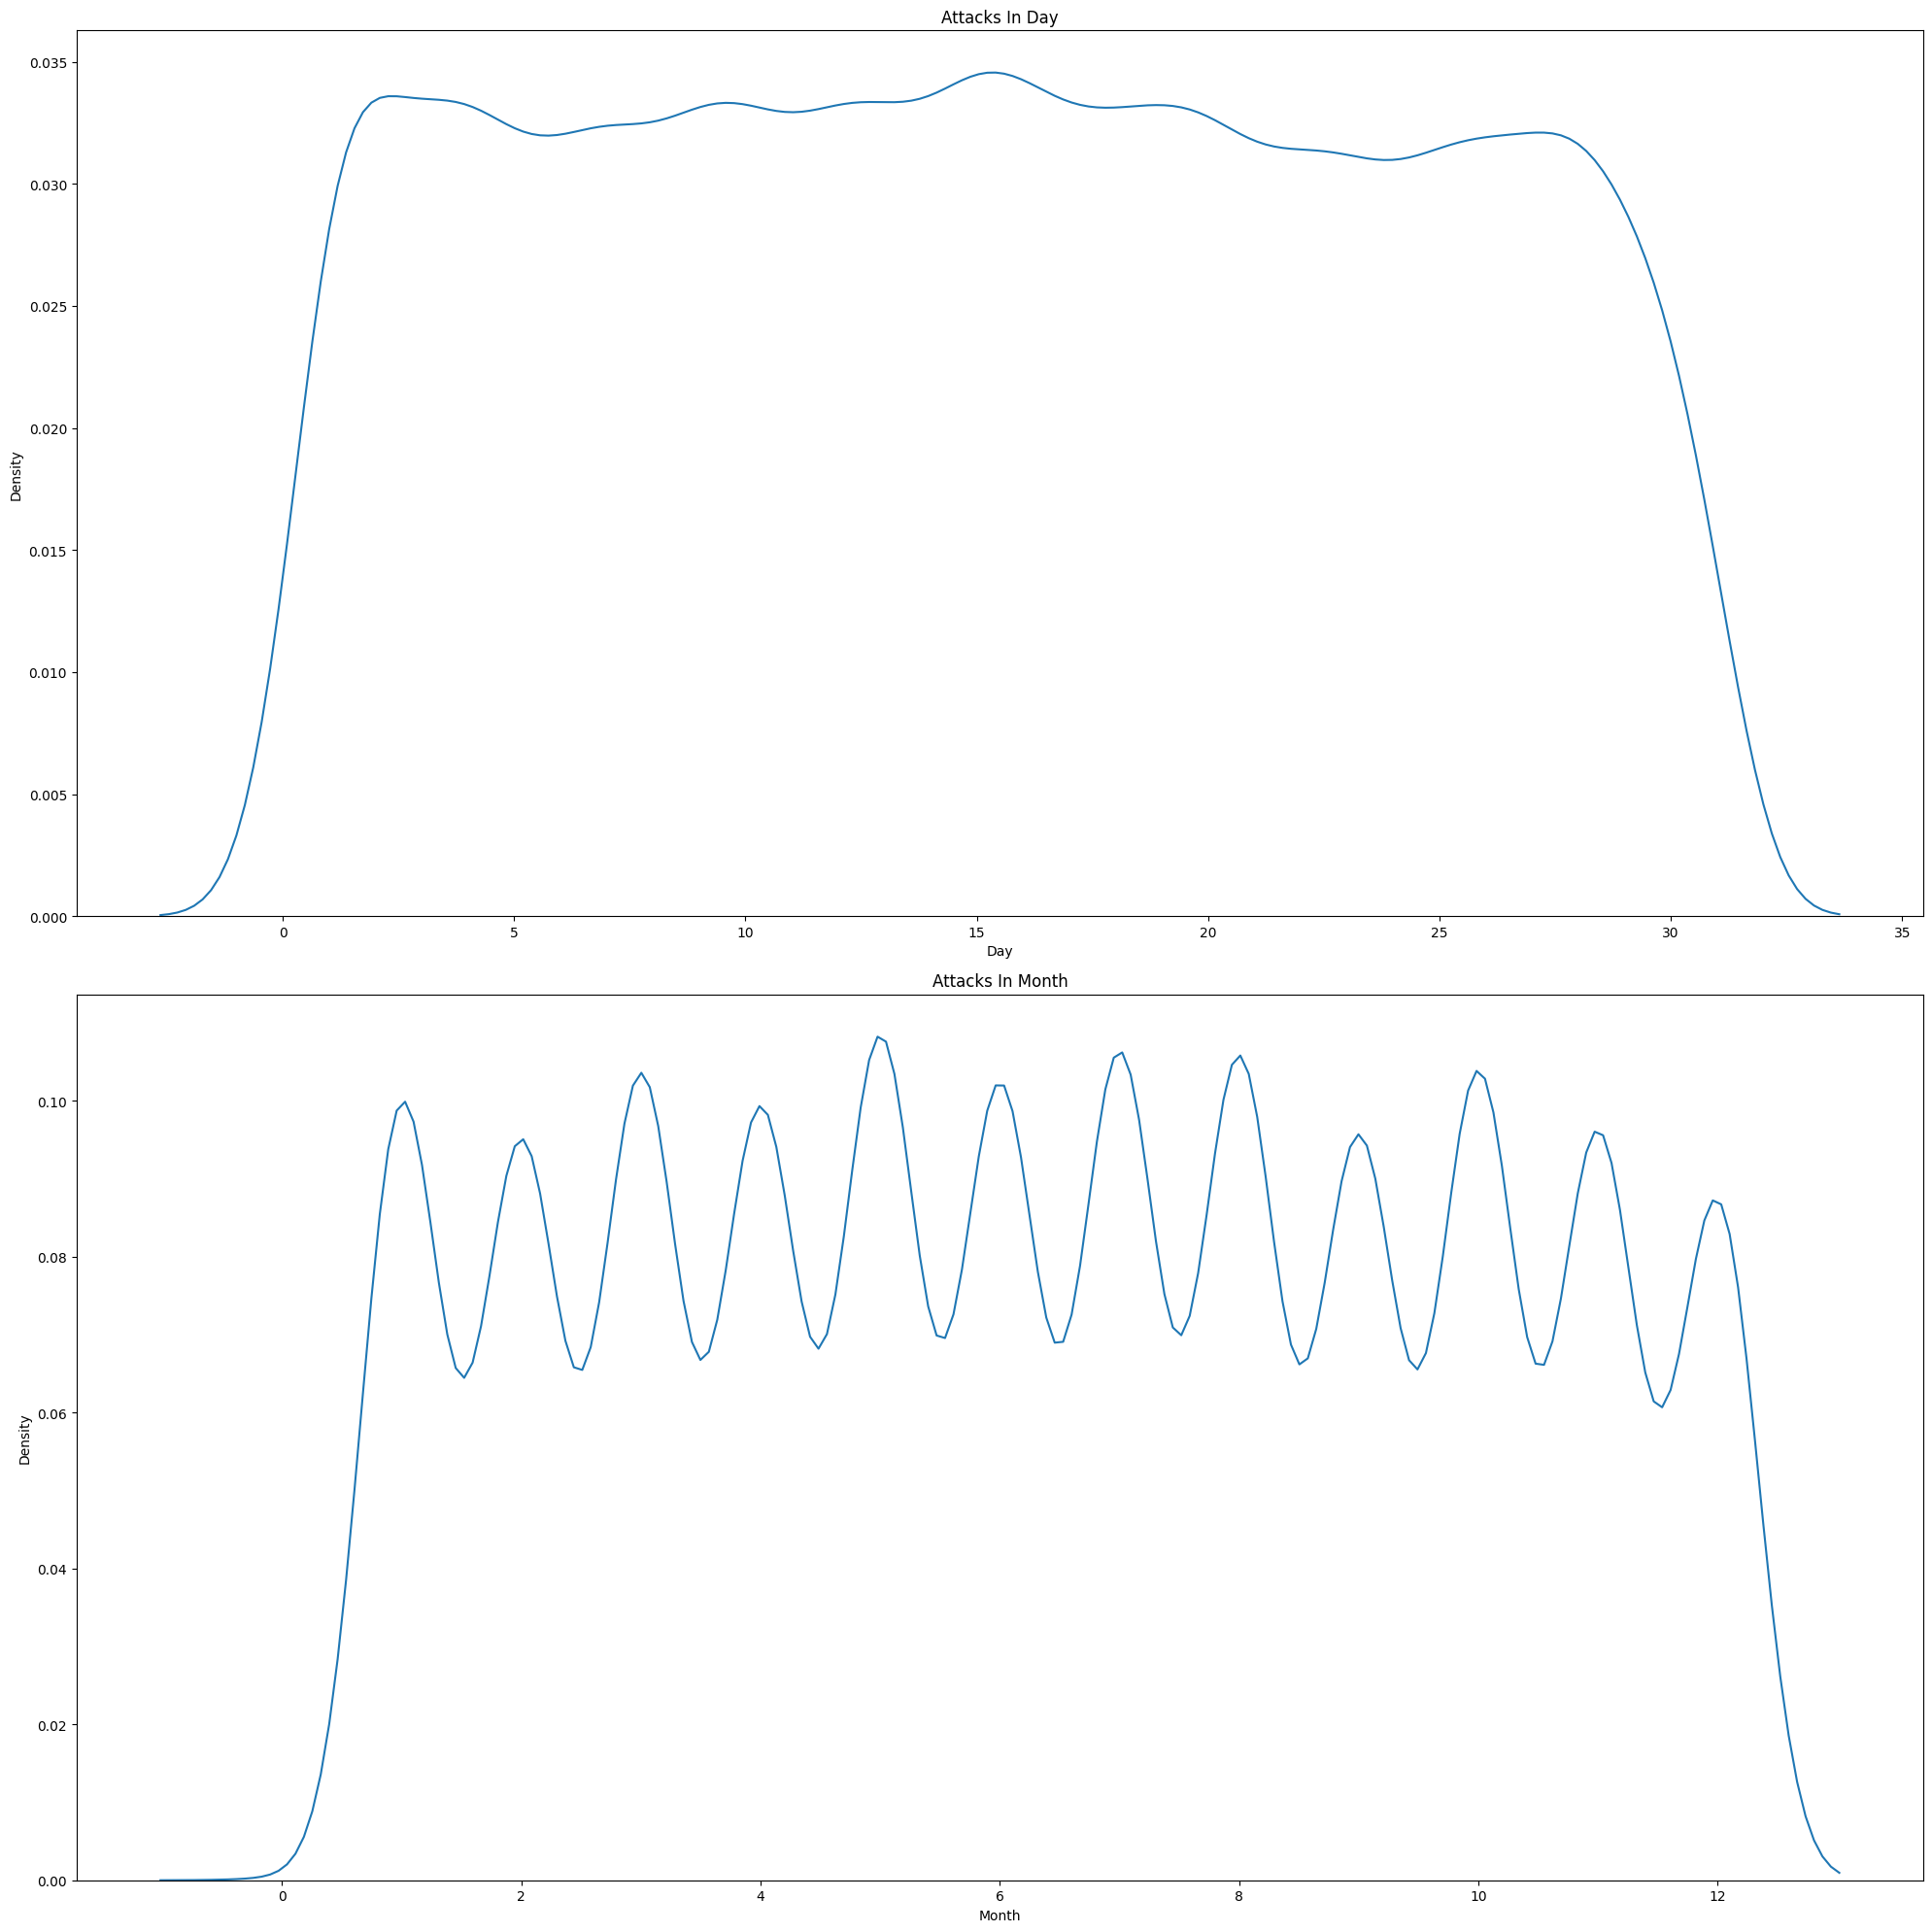

In [126]:
#data visualization
plt.figure(figsize=(20,20))
heading=['Attacks In Day','Attacks In Month']
columns=['Day','Month']
for i,col in enumerate(columns):
  plt.subplot(2,1,i+1)
  plt.title(heading[i])
  sns.kdeplot(x=df[col])
plt.tight_layout()
plt.show()

<ipython-input-127-7b4aacd8044f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='viridis')


<Axes: >

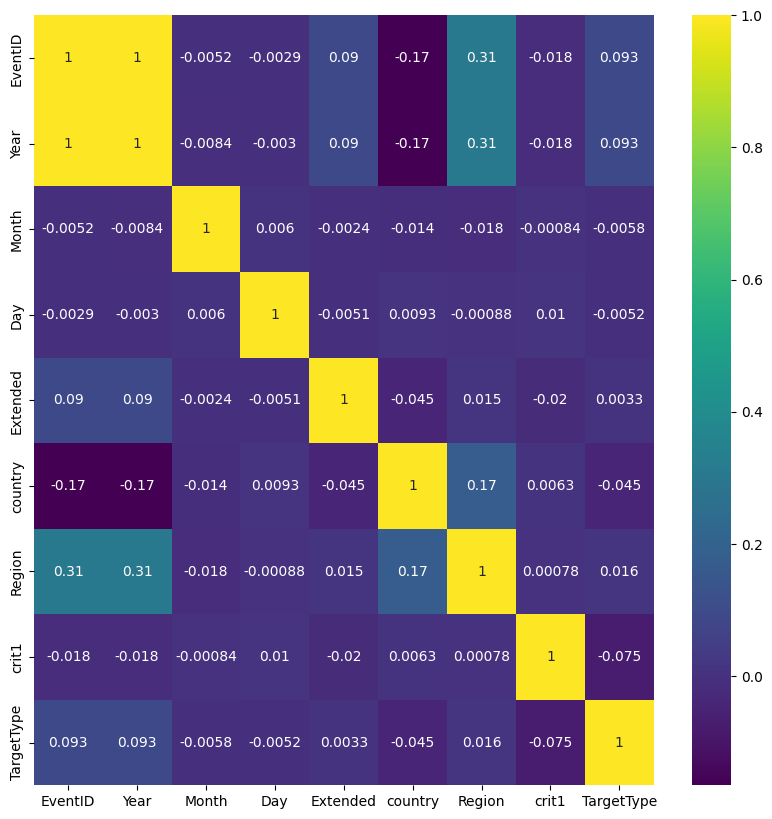

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='viridis')

<ipython-input-128-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

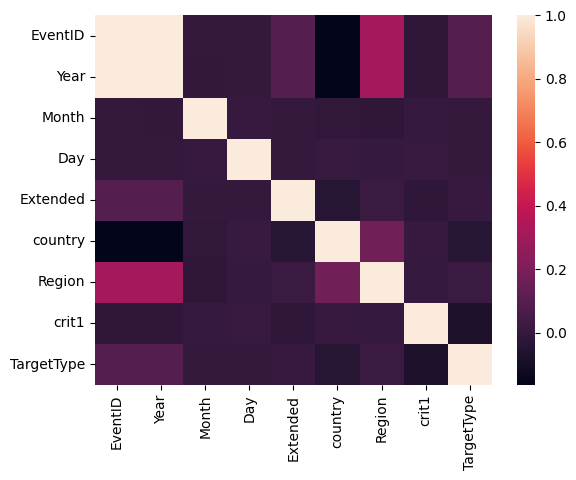

In [128]:
sns.heatmap(df.corr())

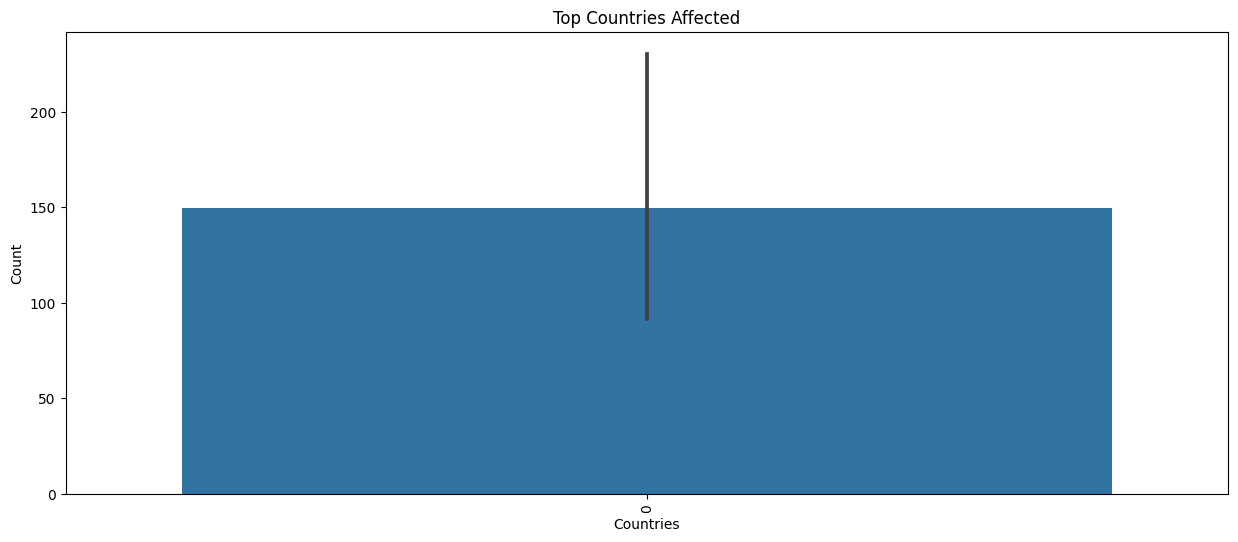

In [129]:
plt.subplots(figsize=(15,6))
sns.barplot(df['country'].value_counts()[:15].index)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

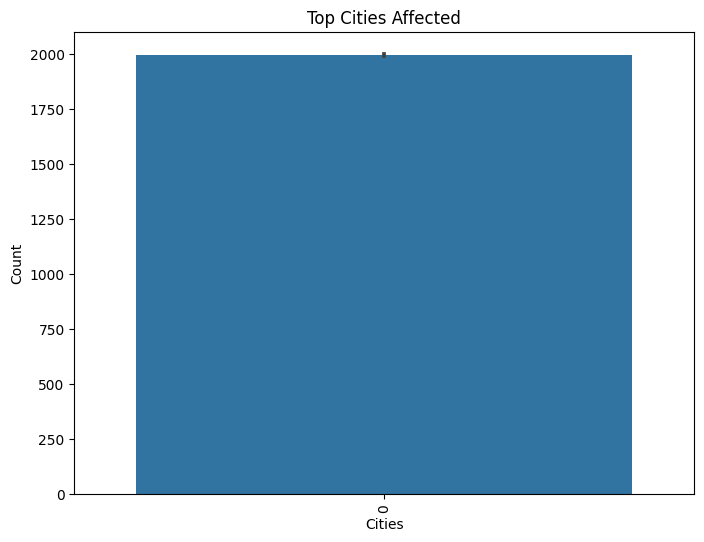

In [130]:
plt.subplots(figsize=(8,6))
sns.barplot(df['Year'].value_counts()[1:15].index)
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

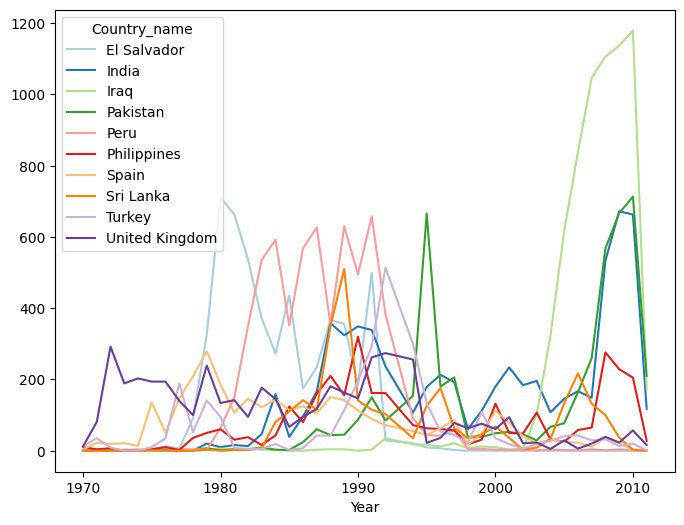

In [131]:
top_groups10=df[df['Country_name'].isin(df['Country_name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Country_name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

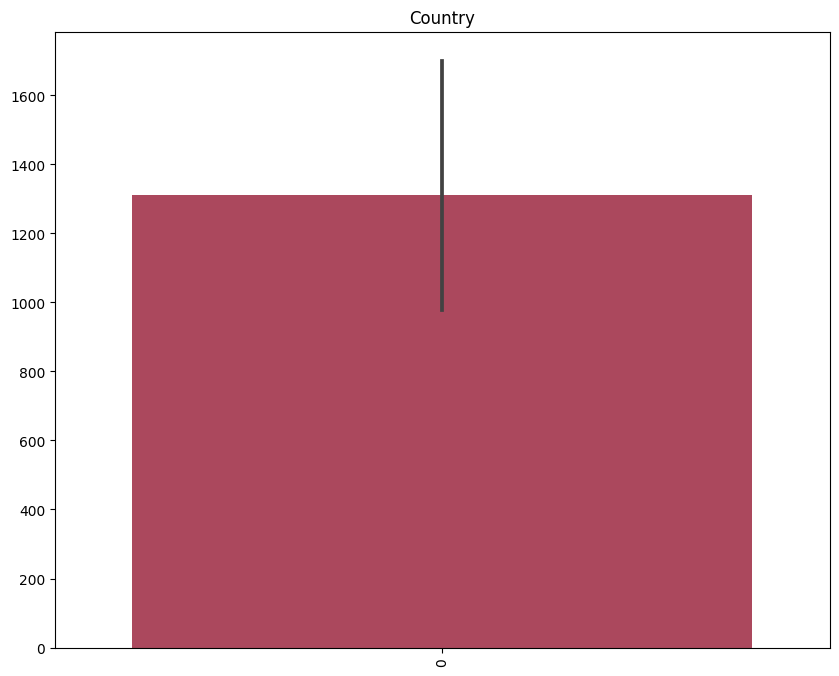

In [132]:
sns.barplot(df['Latitude'].value_counts()[1:15].values,palette='inferno')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Country')
plt.show()

In [133]:
df['WeapSubType1'].value_counts()

Unknown Explosive Type                       28061
Automatic or Semi-Automatic Rifle            15392
0                                            13830
Unknown Gun Type                             13744
Handgun                                       5556
Vehicle                                       3539
Other Explosive Type                          3309
Projectile (rockets, mortars, RPGs, etc.)     2914
Grenade                                       2571
Arson/Fire                                    1599
Knife or Other Sharp Object                   1493
Landmine                                      1471
Dynamite/TNT                                  1048
Suicide (carried bodily by human being)        974
Remote Trigger                                 743
Rifle/Shotgun (non-automatic)                  637
Gasoline or Alcohol                            570
Time Fuse                                      532
Molotov Cocktail/Petrol Bomb                   494
Letter Bomb                    